In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_data = pd.read_csv('./titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('./titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
train_data[['Survived','SibSp','Parch','Pclass']].corr()

,Survived,SibSp,Parch,Pclass
Survived,1.000000,-0.035322,0.081629,-0.338481
SibSp,-0.035322,1.000000,0.414838,0.083081
Parch,0.081629,0.414838,1.000000,0.018443
Pclass,-0.338481,0.083081,0.018443,1.000000


In [7]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Cabin 제거
train_data.dropna(axis=1,thresh=500,inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
# Embarked 최빈값('S')으로 대체
train_data['Embarked'].fillna('S',inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
train_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)
train_data['Embarked'].describe()

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [12]:
# Sex 숫자로 변경 {'male':0,'female':1}
train_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


In [13]:
train_data['Name'] = train_data['Name'].apply(lambda x:x[x.find(',')+2:x.find('.')])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,0
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,0,27.0,0,0,211536,13.0000,0
887,888,1,1,Miss,1,19.0,0,0,112053,30.0000,0
888,889,0,3,Miss,1,NaN,1,2,W./C. 6607,23.4500,0
889,890,1,1,Mr,0,26.0,0,0,111369,30.0000,1


In [14]:
train_data['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [15]:
train_data.loc[(train_data['Survived']==0)]['Name'].value_counts()

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Don           1
Major         1
Col           1
Capt          1
Jonkheer      1
Name: Name, dtype: int64

In [16]:
#Name 컬럼 삭제
train_data.drop(columns='Name',axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,0
887,888,1,1,1,19.0,0,0,112053,30.0000,0
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,0
889,890,1,1,0,26.0,0,0,111369,30.0000,1


In [17]:
#Ticket 컬럼 삭제
train_data.drop(columns='Ticket',axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,NaN,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [18]:
train_data.loc[(train_data['Survived']==1)]['Embarked'].value_counts()

0    219
1     93
2     30
Name: Embarked, dtype: int64

In [19]:
train_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

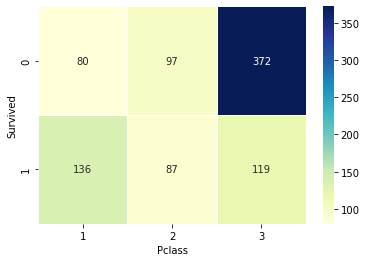

In [21]:
table = train_data.pivot_table(index=['Survived'],columns=['Pclass'],
                           aggfunc='size')
table
sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu',linewidths=.5, cbar=True)

plt.show()


In [22]:
f_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==1)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==1)]['Pclass'].count()
f_d = 1-f_s
f_d = round(f_d*100,2)
f_s = round(f_s*100,2)
f_s,f_d

(62.96, 37.04)

In [23]:
s_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==2)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==2)]['Pclass'].count()
s_d = 1-s_s
s_d = round(s_d*100,2)
s_s = round(s_s*100,2)
s_s,s_d

(47.28, 52.72)

In [24]:
t_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==3)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==3)]['Pclass'].count()
t_d = 1-t_s
t_d = round(t_d*100,2)
t_s = round(t_s*100,2)
t_s,t_d

(24.24, 75.76)

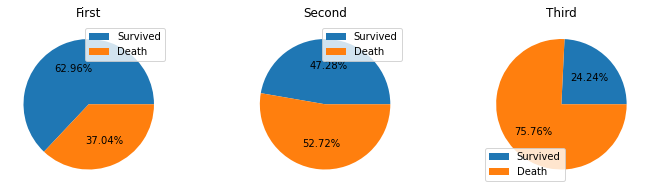

In [25]:
f,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].pie([f_s,f_d],autopct='%.2f%%')
ax[1].pie([s_s,s_d],autopct='%.2f%%')
ax[2].pie([t_s,t_d],autopct='%.2f%%')
for idx, i in enumerate(['First','Second','Third']):    
    ax[idx].set_title(i)
    ax[idx].legend(['Survived','Death'])
plt.show()

In [26]:
ma_s = train_data.loc[(train_data['Survived']==1)&(train_data['Sex']==0)]['Sex'].count()\
/train_data.loc[(train_data['Sex']==0)]['Pclass'].count()
ma_d = 1-ma_s
ma_d = round(ma_d*100,2)
ma_s = round(ma_s*100,2)
ma_s,ma_d

(18.89, 81.11)

In [27]:
fe_s = train_data.loc[(train_data['Survived']==1)&(train_data['Sex']==1)]['Sex'].count()\
/train_data.loc[(train_data['Sex']==1)]['Pclass'].count()
fe_d = 1-fe_s
fe_d = round(fe_d*100,2)
fe_s = round(fe_s*100,2)
fe_s,fe_d

(74.2, 25.8)

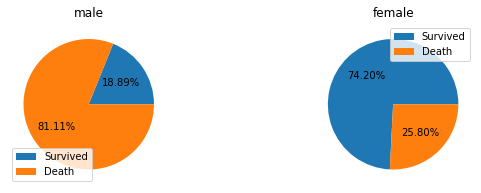

In [28]:
f,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].pie([ma_s,ma_d],autopct='%.2f%%')
ax[1].pie([fe_s,fe_d],autopct='%.2f%%')
for idx, i in enumerate(['male','female']):    
    ax[idx].set_title(i)
    ax[idx].legend(['Survived','Death'])
plt.show()

C:\Users\hongj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

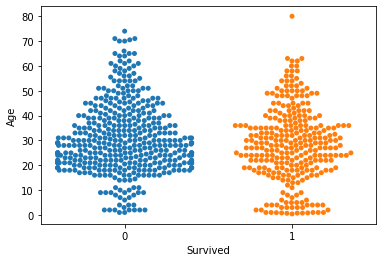

In [29]:
sns.swarmplot(x='Survived',y='Age',data=train_data)

In [30]:
train_data.drop(columns='PassengerId',axis=1,inplace=True)
train_data.drop(columns='SibSp',axis=1,inplace=True)
train_data


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,0
1,1,1,1,38.0,0,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,0,53.1000,0
4,0,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0
887,1,1,1,19.0,0,30.0000,0
888,0,3,1,NaN,2,23.4500,0
889,1,1,0,26.0,0,30.0000,1


In [31]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [32]:
ss=StandardScaler()
# X=train_data.iloc[:,1:]

# scaled_X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
# scaled_X

ag=train_data.dropna(axis=0)['Age']
c=train_data.fillna(ag.mean())

e=c.loc[:,['Fare','Age']]
f=train_data.loc[:,['Fare','Age']]
ss.fit(e)

a = pd.DataFrame(ss.transform(f),columns=f.columns)
sc_train_data=train_data.copy()
sc_train_data['Fare']=a.loc[:,'Fare']
sc_train_data['Age']=a.loc[:,'Age']
sc_train_data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,-0.592481,0,-0.502445,0
1,1,1,1,0.638789,0,0.786845,1
2,1,3,1,-0.284663,0,-0.488854,0
3,1,1,1,0.407926,0,0.420730,0
4,0,3,0,0.407926,0,-0.486337,0
...,...,...,...,...,...,...,...
886,0,2,0,-0.207709,0,-0.386671,0
887,1,1,1,-0.823344,0,-0.044381,0
888,0,3,1,NaN,2,-0.176263,0
889,1,1,0,-0.284663,0,-0.044381,1


In [33]:
# X_AN=scaled_X.drop(columns='Age',axis=1)
# X_A=scaled_X.dropna(axis=0)
X_AN=sc_train_data.drop(columns='Age',axis=1)
X_A=sc_train_data.dropna(axis=0)

In [34]:
X_AN

,Survived,Pclass,Sex,Parch,Fare,Embarked
0,0,3,0,0,-0.502445,0
1,1,1,1,0,0.786845,1
2,1,3,1,0,-0.488854,0
3,1,1,1,0,0.420730,0
4,0,3,0,0,-0.486337,0
...,...,...,...,...,...,...
886,0,2,0,0,-0.386671,0
887,1,1,1,0,-0.044381,0
888,0,3,1,2,-0.176263,0
889,1,1,0,0,-0.044381,1


In [35]:
X_A.reset_index(drop=True,inplace=True)
X_A

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,-0.592481,0,-0.502445,0
1,1,1,1,0.638789,0,0.786845,1
2,1,3,1,-0.284663,0,-0.488854,0
3,1,1,1,0.407926,0,0.420730,0
4,0,3,0,0.407926,0,-0.486337,0
...,...,...,...,...,...,...,...
709,0,3,1,0.715743,5,-0.061999,2
710,0,2,0,-0.207709,0,-0.386671,0
711,1,1,1,-0.823344,0,-0.044381,0
712,1,1,0,-0.284663,0,-0.044381,1


In [36]:
y_AN=train_data.iloc[:,0]
y_A=train_data.dropna(axis=0).iloc[:,0]

In [37]:
y_AN

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
y_A.reset_index(drop=True,inplace=True)
y_A

0      0
1      1
2      1
3      1
4      0
      ..
709    0
710    0
711    1
712    1
713    0
Name: Survived, Length: 714, dtype: int64

In [39]:
train_XAN,test_XAN,train_YAN,test_YAN = train_test_split(X_AN,y_AN,test_size=0.2)
train_XA,test_XA,train_YA,test_YA = train_test_split(X_A,y_A,test_size=0.2)


In [40]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC



In [42]:
clf1=AdaBoostClassifier()
clf2=RandomForestClassifier()
clf3=SVC(kernel='linear')

In [43]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3,n_estimators=10)]


In [44]:
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'voting',
                    'bagging'
                    ]

In [45]:
train_XAN

,Survived,Pclass,Sex,Parch,Fare,Embarked
203,0,3,0,0,-0.502949,1
660,1,1,0,0,2.042579,0
539,1,1,1,2,0.348245,1
331,0,1,0,0,-0.074583,0
334,1,1,1,0,2.042579,0
...,...,...,...,...,...,...
56,1,2,1,0,-0.437007,0
318,1,1,1,2,2.671118,0
876,0,3,0,0,-0.450180,0
490,0,3,0,0,-0.246398,0


Mean accuracy of D_tree : 100.00 %
y_pred of D_tree : 100.00 %
Mean accuracy of RF : 100.00 %
y_pred of RF : 100.00 %
Mean accuracy of GNB : 100.00 %
y_pred of GNB : 100.00 %
Mean accuracy of KNN : 99.01 %
y_pred of KNN : 100.00 %
Mean accuracy of Ada : 100.00 %
y_pred of Ada : 100.00 %
Mean accuracy of QDA : 99.86 %
y_pred of QDA : 98.32 %
Mean accuracy of SVM_1 : 100.00 %
y_pred of SVM_1 : 100.00 %
Mean accuracy of SVM_k : 62.92 %
y_pred of SVM_k : 56.42 %


C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.

Mean accuracy of voting : 100.00 %
y_pred of voting : 100.00 %
Mean accuracy of bagging : 100.00 %
y_pred of bagging : 100.00 %


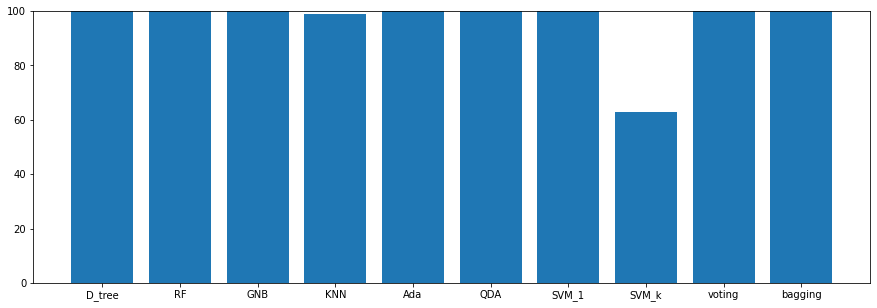

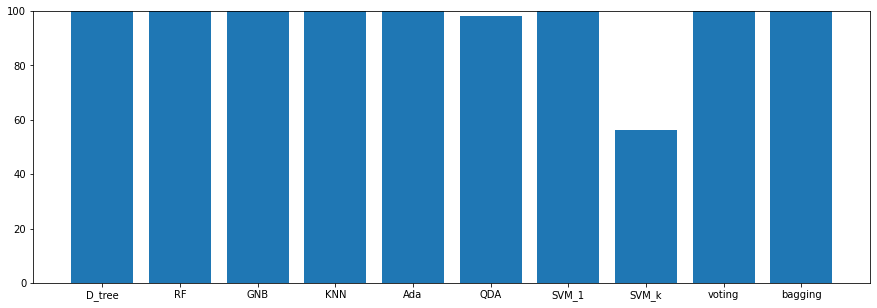

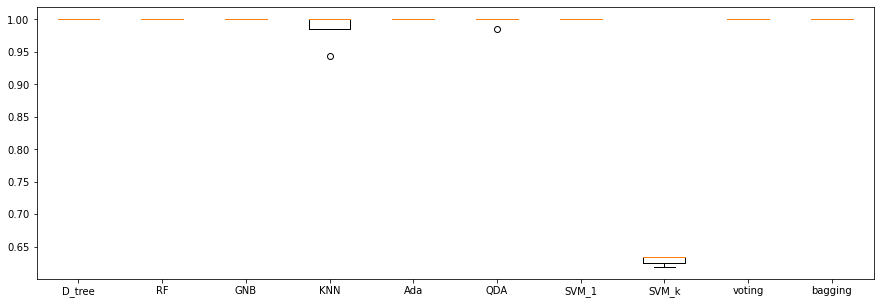

In [46]:
modelaccuracies = []
modelmeans = []
modelnames = []
y_pred = []

classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=train_XAN,y=train_YAN,cv=skf)
  classifier.fit(train_XAN,train_YAN)
  y_pred.append(classifier.score(test_XAN,test_YAN)*100)
  print("Mean accuracy of",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  print("y_pred of",classifier_name,': {:.2f} %'.format(classifier.score(test_XAN,test_YAN)*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,modelmeans)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,y_pred)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()


Mean accuracy of D_tree : 100.00 %
y_pred of D_tree : 100.00 %
Mean accuracy of RF : 100.00 %
y_pred of RF : 100.00 %
Mean accuracy of GNB : 100.00 %
y_pred of GNB : 100.00 %
Mean accuracy of KNN : 97.20 %
y_pred of KNN : 98.60 %
Mean accuracy of Ada : 100.00 %
y_pred of Ada : 100.00 %
Mean accuracy of QDA : 99.47 %
y_pred of QDA : 100.00 %
Mean accuracy of SVM_1 : 100.00 %
y_pred of SVM_1 : 100.00 %


C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hongj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.

Mean accuracy of SVM_k : 59.02 %
y_pred of SVM_k : 60.84 %
Mean accuracy of voting : 100.00 %
y_pred of voting : 100.00 %
Mean accuracy of bagging : 100.00 %
y_pred of bagging : 100.00 %


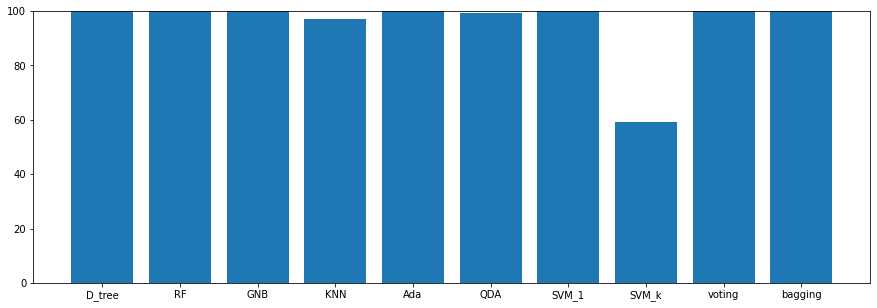

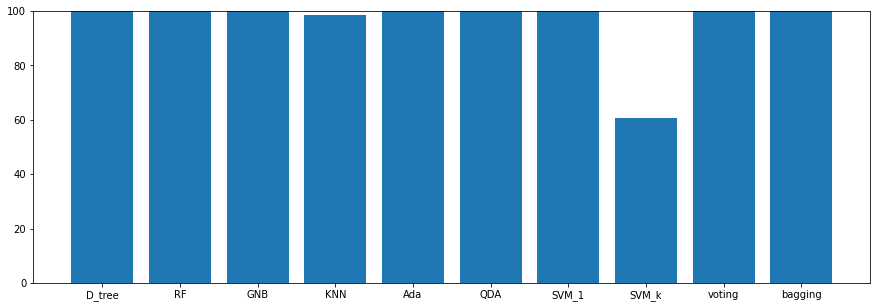

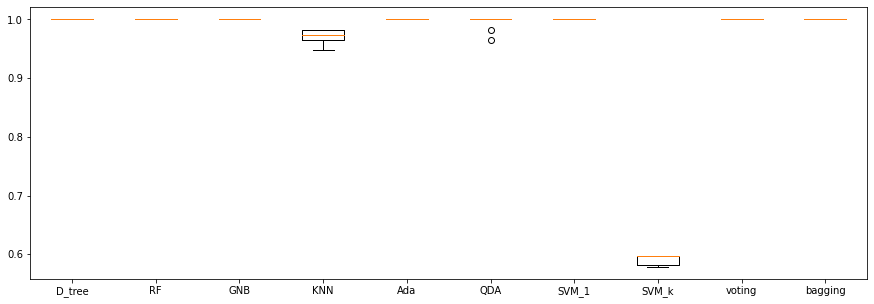

In [47]:
modelaccuracies = []
modelmeans = []
modelnames = []
y_pred = []
classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=train_XA,y=train_YA,cv=skf)
  classifier.fit(train_XA,train_YA)
  y_pred.append(classifier.score(test_XA,test_YA)*100)
  print("Mean accuracy of",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  print("y_pred of",classifier_name,': {:.2f} %'.format(classifier.score(test_XA,test_YA)*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,modelmeans)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,y_pred)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

In [48]:
vo = VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                  ('2',RandomForestClassifier()),
                                  ('3',SVC(kernel='linear')),
                                 ('4',GaussianNB())])
vo.fit(train_XAN,train_YAN)
y_pred = vo.score(test_XAN,test_YAN)
skf = StratifiedKFold(n_splits=5,shuffle=True)
accuracies = cross_val_score(estimator=classifier,X=train_XAN,y=train_YAN,cv=skf)
print("accuracy of",': {:.2f} %'.format(accuracies.mean()*100))
print("Strandard Deviation of",': {:.2f} %'.format(accuracies.std()*100))
print("y_pred of",': {:.2f} %'.format(y_pred*100))

accuracy of : 100.00 %
Strandard Deviation of : 0.00 %
y_pred of : 100.00 %


In [49]:
train_data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,0
1,1,1,1,38.0,0,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,0,53.1000,0
4,0,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0
887,1,1,1,19.0,0,30.0000,0
888,0,3,1,NaN,2,23.4500,0
889,1,1,0,26.0,0,30.0000,1


In [50]:
# test_data.drop(columns='PassengerId','Name','SibSp','Ticket','Cabin'],axis=1,inplace=True)
test_data['Fare'].median()

14.4542

In [56]:
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [52]:

test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [53]:
# Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
test_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,0


In [54]:
# Sex 숫자로 변경 {'male':0,'female':1}
test_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0


In [55]:
# 스케일링
tf=test_data.loc[:,['Fare','Age']]

ta = pd.DataFrame(ss.transform(tf),columns=f.columns)
sc_train_data=train_data.copy()
sc_train_data['Fare']=a.loc[:,'Fare']
sc_train_data['Age']=a.loc[:,'Age']
sc_train_data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,-0.592481,0,-0.502445,0
1,1,1,1,0.638789,0,0.786845,1
2,1,3,1,-0.284663,0,-0.488854,0
3,1,1,1,0.407926,0,0.420730,0
4,0,3,0,0.407926,0,-0.486337,0
...,...,...,...,...,...,...,...
886,0,2,0,-0.207709,0,-0.386671,0
887,1,1,1,-0.823344,0,-0.044381,0
888,0,3,1,NaN,2,-0.176263,0
889,1,1,0,-0.284663,0,-0.044381,1
